## Load Data

In [9]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [10]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Normalization Inside Network

In [11]:
# solution 4: Normalization inside network

initializer = tf.keras.initializers.RandomNormal()

#################### YOUR CODE HERE ####################
# Các bạn tìm cách code để add BatchNormalization layer
# trước mỗi hidden layer
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################

# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 5s - loss: 1.7121 - accuracy: 0.5625 - val_loss: 2.3062 - val_accuracy: 0.1000 - 5s/epoch - 44ms/step
Epoch 2/300
118/118 - 3s - loss: 1.1582 - accuracy: 0.7408 - val_loss: 2.2837 - val_accuracy: 0.1650 - 3s/epoch - 25ms/step
Epoch 3/300
118/118 - 3s - loss: 0.9393 - accuracy: 0.7675 - val_loss: 1.9771 - val_accuracy: 0.6084 - 3s/epoch - 25ms/step
Epoch 4/300
118/118 - 3s - loss: 0.8110 - accuracy: 0.7842 - val_loss: 1.2107 - val_accuracy: 0.7783 - 3s/epoch - 25ms/step
Epoch 5/300
118/118 - 3s - loss: 0.7266 - accuracy: 0.7972 - val_loss: 0.8069 - val_accuracy: 0.7934 - 3s/epoch - 25ms/step
Epoch 6/300
118/118 - 3s - loss: 0.6662 - accuracy: 0.8086 - val_loss: 0.6778 - val_accuracy: 0.8061 - 3s/epoch - 25ms/step
Epoch 7/300
118/118 - 3s - loss: 0.6218 - accuracy: 0.8171 - val_loss: 0.6244 - val_accuracy: 0.8109 - 3s/epoch - 25ms/step
Epoch 8/300
118/118 - 3s - loss: 0.5876 - accuracy: 0.8232 - val_loss: 0.5921 - val_accuracy: 0.8166 - 3s/epoch - 25ms/step
Epoch 9/

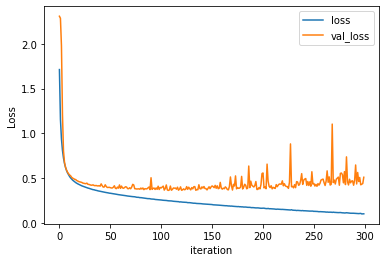

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

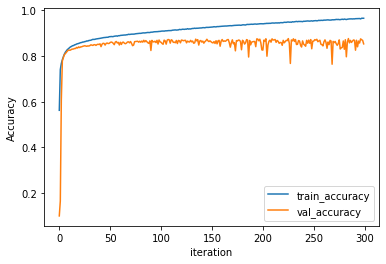

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()